# 2021年8月26日


http://bang.dangdang.com/books/newhotsales/01.52.00.00.00.00-year-2020-0-1-1

根据这个榜，整理一下2020和 2019年的出版社信息，前200哪些出版社，有几本书 这样的

In [2]:
from selenium import webdriver
from tqdm import tqdm
import pandas as pd
import requests
from bs4 import BeautifulSoup

headers = {
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
}


In [3]:
driver = webdriver.Chrome()

In [39]:
import time
#url = "http://bang.dangdang.com/books/newhotsales/01.52.00.00.00.00-year-2020-0-1-%d"
url = "http://bang.dangdang.com/books/newhotsales/01.52.00.00.00.00-year-2019-0-1-%d"
plist = []   # 获取前500名的出版社
for i in range(1,26):
    driver.get(url% i)
    publishs = driver.find_elements_by_xpath("//div[@class='publisher_info']/span/following-sibling::a")
    for p in publishs:
        plist.append(p.text)
    time.sleep(5)

print(plist)


['北京联合出版有限公司', '中信出版社', '北京联合出版有限公司', '湖南科技出版社', '科学出版社', '文化发展出版社', '北京时代华文书局', '湖南科技出版社', '中国友谊出版公司', '中信出版社', '人民邮电出版社', '天津人民出版社', '天津科学技术出版社', '中信出版社', '北京联合出版有限公司', '北京时代华文书局', '中信出版社', '化学工业出版社', '中信出版社', '江西人民出版社', '海南出版社', '湖南科技出版社', '北京时代华文书局', '南海出版公司', '北京联合出版有限公司', '北京时代华文书局', '北京时代华文书局', '中信出版社', '北京联合出版有限公司', '湖南科技出版社', '中信出版社', '江苏科学技术出版社', '商务印书馆', '中信出版社', '中信出版社', '北京时代华文书局', '江西教育出版社', '北京联合出版有限公司', '人民邮电出版社', '化学工业出版社', '北京时代华文书局', '北京时代华文书局', '海南出版社', '湖南科技出版社', '民主与建设出版社', '北京联合出版有限公司', '团结出版社', '团结出版社', '江苏科学技术出版社', '黑龙江科学技术出版社', '中国画报出版社', '重庆大学出版社', '商务印书馆', '中信出版社', '北京时代华文书局', '北京时代华文书局', '北京时代华文书局', '北京联合出版有限公司', '北京联合出版有限公司', '中信出版社', '北京时代华文书局', '湖南科技出版社', '天津科学技术出版社', '译林出版社', '北京时代华文书局', '江苏凤凰文艺出版社', '天津人民出版社', '湖南科技出版社', '人民邮电出版社', '中国友谊出版公司', '北京时代华文书局', '台海出版社', '北京联合出版有限公司', '译林出版社', '商务印书馆', '清华大学出版社', '商务印书馆', '团结出版社', '广西师范大学出版社', '上海科技教育出版社', '江苏凤凰科学技术出版社', '北京时代华文书局', '北京时代华文书局', '北京联合出版有限公司', '人民邮电出版社', '北京联合出版有限公司', '中国画报出版社', '中信出版社', '浙江人民出

In [41]:
df = pd.DataFrame(plist,columns=["pub"])

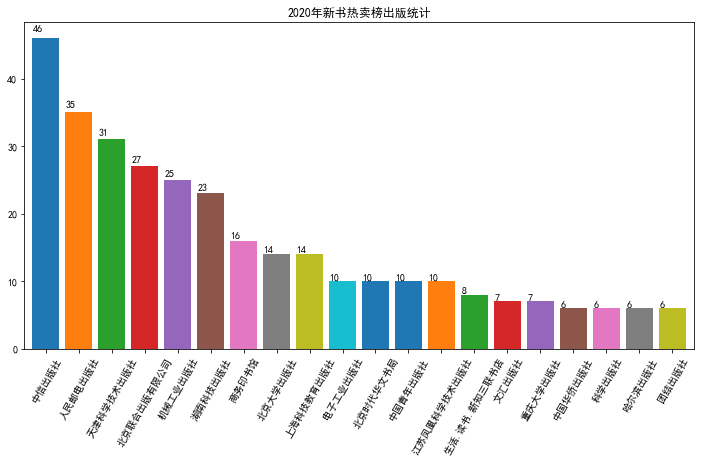

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
l1count = df["pub"].value_counts()[:20]

ax = l1count.plot.bar(width=0.8, title="2020年新书热卖榜出版统计",
        rot=60, figsize=(12,6)) #, legend=True)
for p in ax.patches:
    #ax.annotate("%.2f%%" % (p.get_height()*100), (p.get_x(), p.get_height() * 1.02))
    if p.get_height()==0:
        text = " "
    else:
        text = "%d" % p.get_height()
    ax.annotate( text , (p.get_x(), p.get_height() * 1.02))
plt.savefig('2021年8月26日2020.png', bbox_inches = "tight")  

In [19]:
def get_publisher(driver):  # 获取出版社
    publishs = driver.find_elements_by_xpath("//div[@class='publisher_info']/span/following-sibling::a")
    return publishs[0].text

    


In [46]:
#df.to_excel("2019年畅销榜出版社.xls")
df = pd.read_excel("2020年畅销榜出版社.xls")

In [47]:
df

,pub
0,文汇出版社
1,江苏凤凰文艺出版社
2,接力出版社
3,文汇出版社
4,国际文化出版公司
5,北京联合出版有限公司
6,中信出版社
7,天津科学技术出版社
8,新星出版社
9,文汇出版社


In [17]:
a1

[<selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="1f61872a-59f5-4233-9a2f-1c40e3a45bf1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="b3052cd1-5ae6-4a78-bbc4-540b1b9ede4f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="a56373fe-d242-4011-a37a-bc7c6ad566d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="33fb51f9-2b41-4fe2-b9a5-0df1f3286c8f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="c424872c-09b0-464a-b777-58343f37db7e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="4c300cff-eb9f-46ab-8d95-e237641bdab2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="565ebacc635cfb05ce7a7e41d9f0711b", element="ea8dcd66-e701-4212-a439-8a